# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
unique_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in unique_cities:
        unique_cities.append(city)

# Print the city count to confirm sufficient count
len(unique_cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# If reposponse OKAY, then save json to cityweather list.
cityweather = []
print('Beginning Data Retrieval')
print('-' * 31)

for i, c in enumerate(unique_cities):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    r = requests.get(f'{base_url}q={c}&appid={api_key}&units=imperial')
    if r.status_code == 200:
        print(f'Processing Record {i:3d} of {len(unique_cities)} | {c.title()}')
        cityweather.append(r.json())
    else:
        print('City not found. Skipping...')
    
print('-' * 31)
print('Data Retrieval Complete')     
print('-' * 31)

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record   1 of 619 | Iguape
Processing Record   2 of 619 | Ushuaia
Processing Record   3 of 619 | Mar Del Plata
Processing Record   4 of 619 | Vaini
Processing Record   5 of 619 | Cayenne
Processing Record   6 of 619 | Hilo
Processing Record   7 of 619 | Castro
Processing Record   8 of 619 | Avarua
Processing Record   9 of 619 | Kulu
Processing Record  10 of 619 | Hobart
Processing Record  11 of 619 | Mataura
Processing Record  12 of 619 | Port Alfred
Processing Record  13 of 619 | Kapaa
City not found. Skipping...
Processing Record  15 of 619 | Canyon
Processing Record  16 of 619 | Mahebourg
Processing Record  17 of 619 | Nicolas Bravo
Processing Record  18 of 619 | Tuktoyaktuk
Processing Record  19 of 619 | Taoudenni
Processing Record  20 of 619 | Hermanus
Processing Record  21 of 619 | Umea
Processing Record  22 of 619 | Lebu
Processing Record  23 of 619 | Jacareacanga
Processing Record  2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data = pd.DataFrame(cityweather)
data.head(1)

,coord,weather,base,main,wind,rain,clouds,dt,sys,timezone,id,name,cod,visibility,snow
0,"{'lon': -47.56, 'lat': -24.7}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 94.62, 'feels_like': 100.98, 'temp_mi...","{'speed': 1.63, 'deg': 90}",{'3h': 0.75},{'all': 75},1576432589,"{'country': 'BR', 'sunrise': 1576397739, 'suns...",-10800,3461465,Iguape,200,NaN,NaN


In [5]:
# Select only City, Cloudiness, Country, Date, Humidity,
# Latitude, Longitude, Max Temperature, and Wind Speed data.
cities = pd.DataFrame({
    'City': data['name'],
    'Cloudiness': [d['all'] for d in data['clouds']],
    'Country': [s['country'] for s in data['sys']],
    'Date': data['dt'],
    'Humidity': [m['humidity'] for m in data['main']],
    'Lat': [c['lat'] for c in data['coord']],
    'Lng': [c['lon'] for c in data['coord']],
    'Max Temp': [m['temp_max'] for m in data['main']],
    'Wind Speed': [m['speed'] for m in data['wind']],
})
cities.to_csv('data/cities.csv')
cities.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [6]:
cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Iguape,75,BR,1576432589,44,-24.70,-47.56,94.62,1.63
1,Ushuaia,75,AR,1576432589,70,-54.81,-68.31,55.40,28.86
2,Mar del Plata,20,AR,1576432589,29,-46.43,-67.52,68.95,5.61
3,Vaini,48,IN,1576432387,70,15.34,74.49,68.65,6.93
4,Cayenne,75,GF,1576432590,83,4.94,-52.33,82.40,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

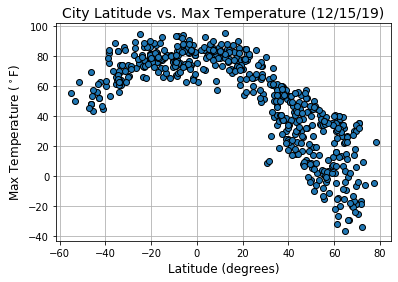

In [7]:
# Save date display as MM/DD/YY
fmt_dt = pd.to_datetime(cities['Date'][0], unit='s')
fmt_dt = fmt_dt.strftime('%m/%d/%y')

# Plot for lat vs max temp
plt.plot(cities['Lat'], cities['Max Temp'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Max Temperature ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel(r'Max Temperature ($^\circ$F)', size=12)
plt.grid()
plt.savefig('images/lat-vs-temp.png')

#### Latitude vs. Humidity Plot

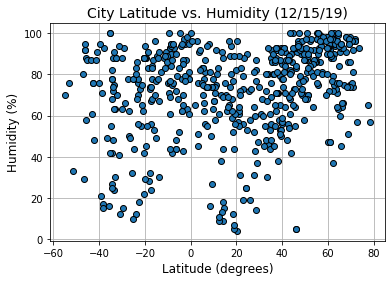

In [8]:
plt.plot(cities['Lat'], cities['Humidity'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Humidity ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-hum.png')

#### Latitude vs. Cloudiness Plot

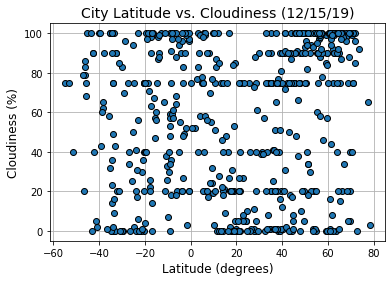

In [9]:
plt.plot( cities['Lat'], cities['Cloudiness'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Cloudiness ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-cloud.png')

#### Latitude vs. Wind Speed Plot

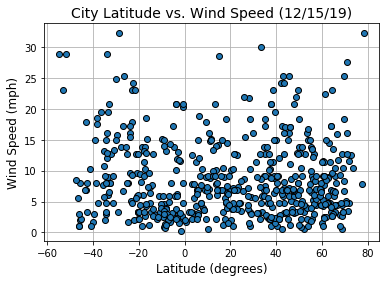

In [10]:
plt.plot(cities['Lat'], cities['Wind Speed'], 'o', markeredgecolor='k')
plt.title(f'City Latitude vs. Wind Speed ({fmt_dt})', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.grid()
plt.savefig('images/lat-vs-speed.png')